In [1]:
# Jupyter Setup
## setting plot height and width within jupyter:
options(repr.plot.width=8, repr.plot.height=3)

# Convert numeric values to colorscale hex
## the following script takes you through the conversion


In [2]:
# necessary libs
library(reshape2)
library(scales)

## Read data

In [3]:
# load data
load("LCdist_ME_DNA_9.RData")# oceanic distance
load("sp.sim_ME_surf_DNA_Jaccard.RData") # species similarity

# convert dist object to dataframe
df_distance <- melt(as.matrix(LCdist_ME_DNA_9), varnames = c("row", "col"))
# convert sim object to dataframe
df_sim <- melt(as.matrix(sp.sim_ME_surf_DNA_Jaccard), varnames = c("row", "col"))

# dissim to sim
df_sim$value <- 1- df_sim$value

# check dfs
head(df_distance, n=10)
head(df_sim, n=10)

,row,col,value
,<int>,<int>,<dbl>
1,1,1,0
2,2,1,2403
3,3,1,4168
4,4,1,7597
5,5,1,10709
6,6,1,16434
7,7,1,15616
8,8,1,11923
9,9,1,5252


,row,col,value
,<fct>,<fct>,<dbl>
1,...24,...24,1.0000000
2,...30,...24,0.1572247
3,...35,...24,0.1613124
4,...39,...24,0.2047054
5,...43,...24,0.1526005
6,...10,...24,0.1216775
7,...11,...24,0.1360083
8,...16,...24,0.1851639
9,...23,...24,0.1683020


# now comes the tricky part:
## 1. converting the similarity values to a colorscale
## 2. plotting this colorscale to put next to the chord diagram
i took this from stackoverflow, it uses _colorRampPalette_ to create a manual color scale

## 1. converting values:

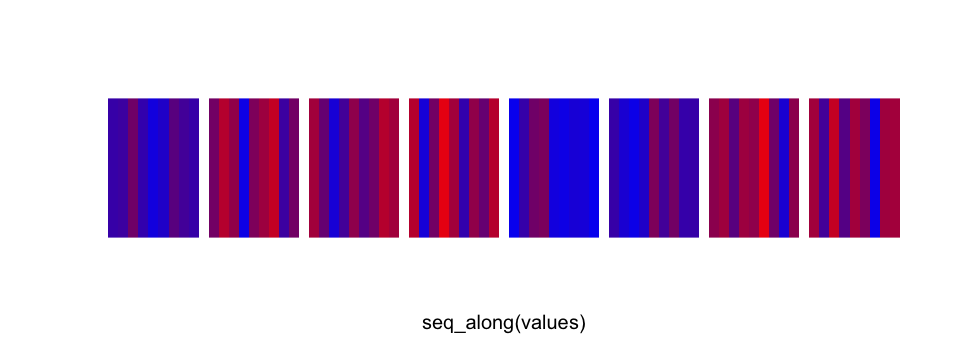

In [4]:
# input the values here:
values <- df_sim$value

# HERE YOU CAN SET THE RANGE OF THE COLORSCALE
## Create breaks on scale from vector of values, that are converted to color later on:
ii <- cut(values, breaks = seq(0.1, 0.3, len = 100), 
          include.lowest = TRUE)

## HERE YOU CAN SET THE COLORS OF THE COLORSCALE:
# it also produces the vector of HEX values, now saved as "colors"
colors <- colorRampPalette(c("blue", "red"))(99)[ii]

## to check your results, plot the "colors" object
image(seq_along(values), .1, as.matrix(seq_along(values)), col=colors,
      axes=FALSE, ylab="")

## 2. now instead of plotting the values, we plot the colorbar
this can then be put next to the final chord diagram for comparison

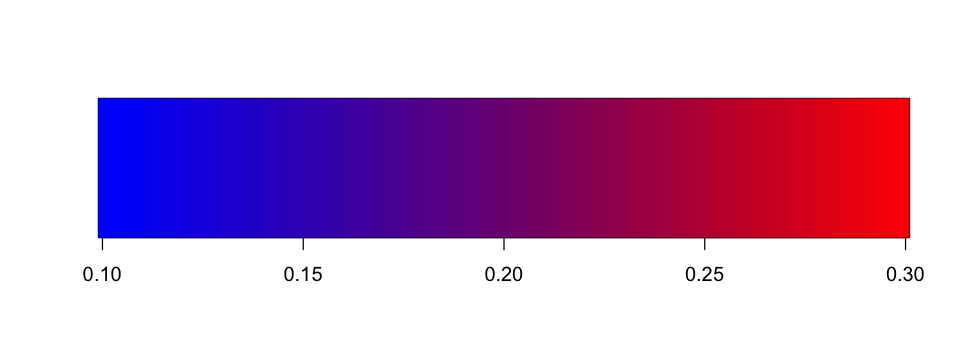

In [37]:
# create values of scale, in order:
scalevals <- seq(0.1,0.3,len=100)

## same as before: split values into bins
# MAKE SURE THIS IS THE SAME AS ABOVE
ii <- cut(scalevals, breaks = seq(0.1, 0.3, len = 100), 
          include.lowest = TRUE)

## convert values into color, can set colorscale here
# MAKE SURE THIS IS THE SAME AS BEFORE
scalecolors <- colorRampPalette(c("blue", "red"))(99)[ii]

## This call then also produces the plot below
image(scalevals, 0, as.matrix(seq_along(scalevals)), col=scalecolors,
      axes=TRUE, xlab="", ylab="", yaxt='n')

In [31]:
# now let's save the above plot as pdf to put next to chorddiagram later:
pdf("colorscale.pdf")
image(scalevals, 0, as.matrix(seq_along(scalevals)), col=scalecolors,
      axes=TRUE, xlab="", ylab="")
dev.off()

pdf 
  2

# NOW let's add the new color vector, and the similarity values to the orignial distance data frame
## and export as csv, to copy the values into inkscape later

In [62]:
# add similarity values
df_distance$sim <- df_sim$value
# add converted color values
df_distance$simcol <- colors

# check output
head(df_distance)

In [120]:
# write to csv file
write.csv(df_distance,"SimDistColors.csv", row.names = FALSE)

,row,col,value,sim,simcol
,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,1,0,1.0000000,NA
2,2,1,2403,0.1572247,#4800B6
3,3,1,4168,0.1613124,#4E00B0
4,4,1,7597,0.2047054,#84007A
5,5,1,10709,0.1526005,#4300BB
6,6,1,16434,0.1216775,#1A00E4


## now all you have to do, is export your chorddiagram as pdf
## open that in inkscape
## manually add the colors from "SimDistColors.csv" to the arrows
## add the exported colorscale next to the plot
# --> done!